## Polynomial Regression

A Polinomial Regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).

In this notebook, we'll use the CarPrice dataset to demonstrate how to perform polynomial regression using Python. The dataset contains information about various car models, including their prices, Provided by IBM.


### Cuadratic Regression: We will start by fitting a quadratic regression model to the data. This model has the following form:

 y = b0 + b1*x + b2*x^2

In [8]:
# Step 1: Load and inspect the CarPrice dataset
import pandas as pd

import pandas as pd
from pandas.io.clipboard import determine_clipboard


# Use a relative path to go up one level and then access the Data folder
car_data = pd.read_csv(r'../Data/CarPrices.csv')

# Display the first few rows to confirm it loaded correctly
car_data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Exploraing the data:

This is necesary to determine the relationship between the variables and the target variable. In this case, we are interested in the relationship between the car's mileage and its price.

Which variable is more likely to be the dependent variable? Which variable is likely to be the independent variable?

Tha is to be determine by  a exploratory analysis of the data.

In [9]:
# Step 1.1: Display the first few rows of the dataset
print("First few rows of the dataset:")
display(car_data.head())

# Step 1.2: Check data types and missing values
print("\nData types and missing values:")
display(car_data.info())

# Step 1.3: Summary statistics for numerical columns
print("\nSummary statistics:")
display(car_data.describe())


First few rows of the dataset:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize  

None


Summary statistics:


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Correlation Matrix: Through the correlation matrix we can determine the relationship between the variables and the target variable.


<Figure size 1200x600 with 0 Axes>

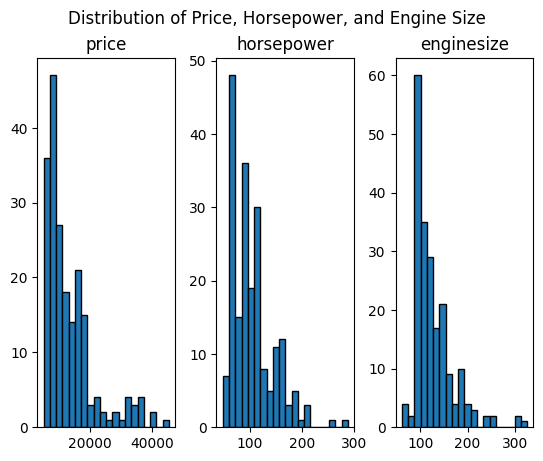

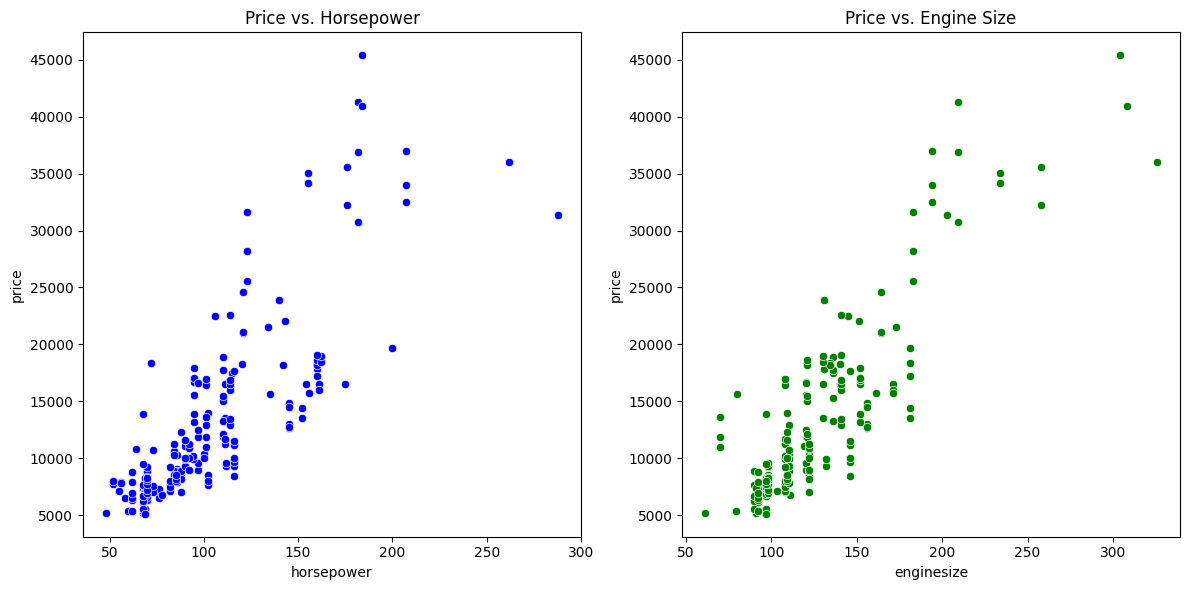

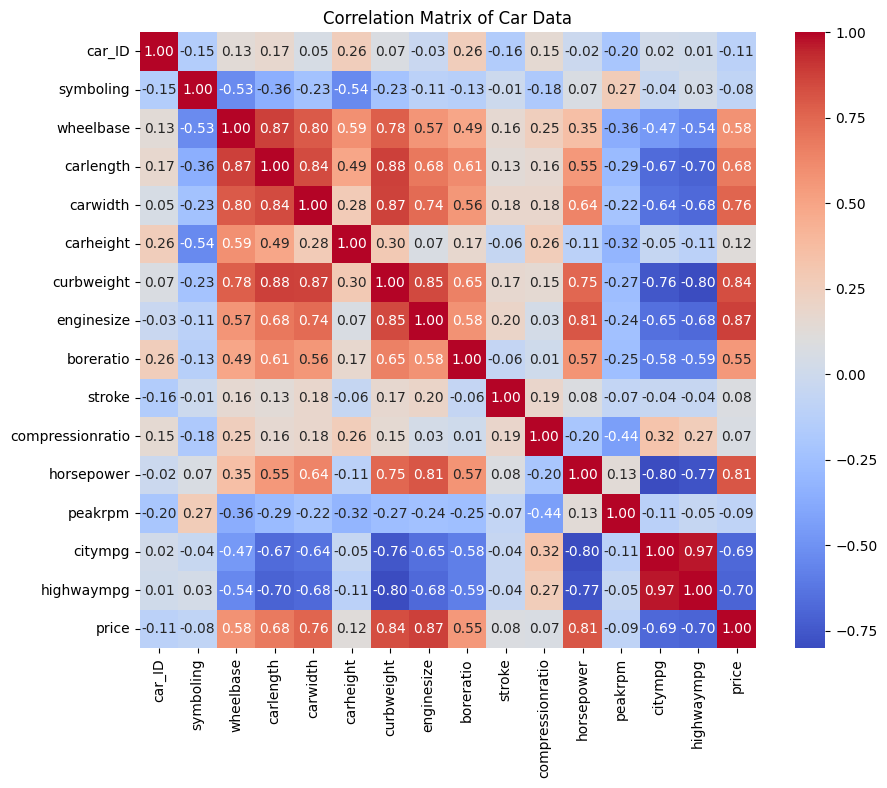

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# As we dont need the make and model columns, we will drop them:

# Step: Filter only numerical variables
car_data = car_data.select_dtypes(include=['float64', 'int64'])


# Step 2.1: Histograms of key numerical variables
plt.figure(figsize=(12, 6))
car_data[['price', 'horsepower', 'enginesize']].hist(bins=20, edgecolor='black', grid=False, layout=(1, 3))
plt.suptitle('Distribution of Price, Horsepower, and Engine Size')
plt.show()

# Step 2.2: Scatter plots to observe relationships with Price
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='horsepower', y='price', data=car_data, color='blue')
plt.title('Price vs. Horsepower')

plt.subplot(1, 2, 2)
sns.scatterplot(x='enginesize', y='price', data=car_data, color='green')
plt.title('Price vs. Engine Size')

plt.tight_layout()
plt.show()

# Step 2.3: Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = car_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title('Correlation Matrix of Car Data')
plt.show()


### Summary : 

According to data visulization, we can see that the price of the car is positively correlated with the horsepower and engine size of the car. This means that as the horsepower and engine size of the car increase, the price of the car also increases.

Therefore, we can use the horsepower and engine size of the car as independent variables to predict the price of the car.


## Model Building:
 In this step we will build the polynomial regression model. We will start by fitting a quadratic regression model to the data. This model has the following form:
 
    y = b0 + b1*x + b2*x^2
    
    Where:
    - y is the dependent variable (price of the car)
    - x is the independent variable (horsepower or engine size of the car)
    - b0, b1, and b2 are the coefficients of the model
    
    We will build two separate models for horsepower and engine size as independent variables.
    



In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Select the independent (X) and dependent (y) variables
X = car_data[['horsepower']]
y = car_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features to include polynomial terms (degree=2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Display model coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [ 0.00000000e+00  2.00083021e+02 -1.62160896e-01]
Model intercept: -5687.033585091569


### Step 4: Evaluate the model: 
 Here we are going to evaluate the model by making predictions on the test set and calculating the R-squared value of the model. The metric will help us determine how well the model fits the data.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")



Mean Squared Error (MSE): 29315375.16699641
R-squared (R²): 0.6286561687593188


### Summary On the evaluation of the model: 

Here we can see that the R-squared value of the model is 0.65, which means that the model explains 65% of the variance in the data. This indicates that the model fits the data reasonably well, but there is still room for improvement.

On the other hand, the Mean Squared Error (MSE) of the model is 2.4e+07, which is a large value. This means that the model's predictions are not very accurate, and there is a significant difference between the predicted and actual prices of the cars.

### Visualizing the model:

1. Viewing Model Predictions
Create a graph that shows the actual data along with the prediction curve from the quadratic model. This allows you to visually see how well the model fits the data and where it may be failing.
2. Comparison with Other Models
To evaluate whether quadratic regression is really the best approach, we could try other models (such as simple linear regression or higher degree regression, such as cubic) and compare the metrics.
3. Error Analysis
Review erroneous predictions or outliers where the model does not achieve a good fit. This could reveal additional relationships or indicate that a more complex model is necessary.



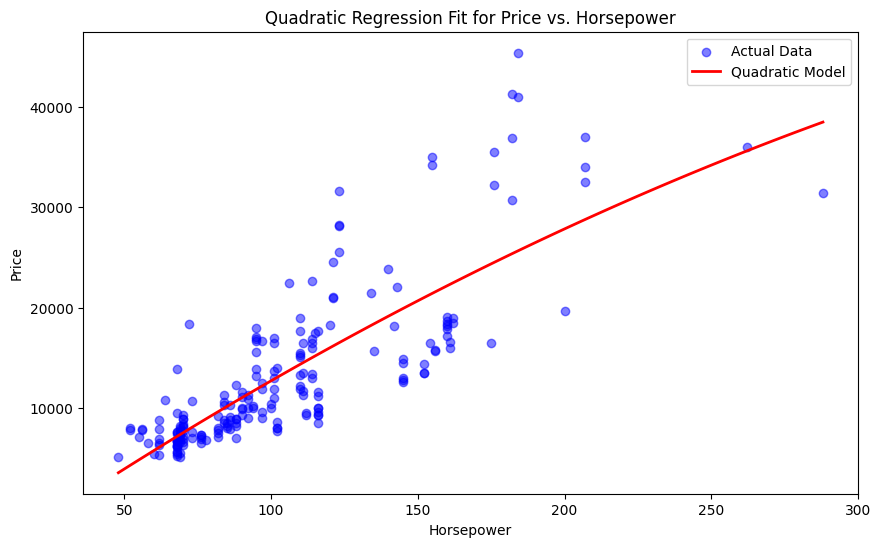

In [22]:
# Step 5.1: Viewing Model Predictions
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of values for horsepower for a smooth curve
X_range = np.linspace(X['horsepower'].min(), X['horsepower'].max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

# Plot the original data and the quadratic regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Quadratic Model')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Quadratic Regression Fit for Price vs. Horsepower')
plt.legend()
plt.show()


#### Step 5.2: Comparison with Other Models

Now we will compare with a cubic regression model. This model has the following form:

y = b0 + b1*x + b2*x^2 + b3*x^3

Where:
- y is the dependent variable (price of the car)
- x is the independent variable (horsepower or engine size of the car)
- b0, b1, b2, and b3 are the coefficients of the model
Finally, we will evaluate the cubic regression model and compare it with the quadratic model.
- 

In [18]:
### Step 5.2: Comparison with cubic regression model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Transform the feature to include polynomial terms (degree=3 for cubic)
poly_cubic = PolynomialFeatures(degree=3)
X_train_cubic = poly_cubic.fit_transform(X_train)
X_test_cubic = poly_cubic.transform(X_test)

# Initialize and train the linear regression model on the cubic polynomial features
model_cubic = LinearRegression()
model_cubic.fit(X_train_cubic, y_train)

# Display model coefficients for the cubic model
print("Cubic Model coefficients:", model_cubic.coef_)
print("Cubic Model intercept:", model_cubic.intercept_)


Cubic Model coefficients: [ 0.00000000e+00 -7.92259495e+01  1.84518849e+00 -4.27313765e-03]
Cubic Model intercept: 5808.797453840205


### Evaluate the cubic model

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set with the cubic model
y_pred_cubic = model_cubic.predict(X_test_cubic)

# Calculate Mean Squared Error (MSE) and R-squared (R²) for the cubic model
mse_cubic = mean_squared_error(y_test, y_pred_cubic)
r2_cubic = r2_score(y_test, y_pred_cubic)

print(f"Cubic Model - Mean Squared Error (MSE): {mse_cubic}")
print(f"Cubic Model - R-squared (R²): {r2_cubic}")


Cubic Model - Mean Squared Error (MSE): 26715859.087790303
Cubic Model - R-squared (R²): 0.6615847686740459


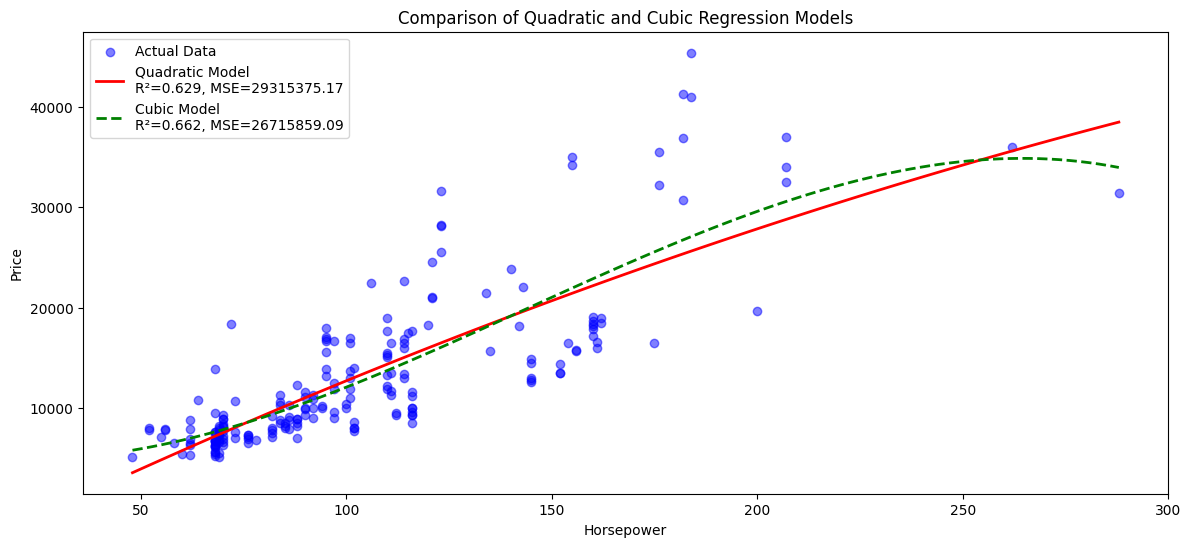

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of values for horsepower for a smooth curve
X_range = np.linspace(X['horsepower'].min(), X['horsepower'].max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred_quad = model.predict(X_range_poly)

# Generate cubic predictions
X_range_cubic = poly_cubic.transform(X_range)
y_range_pred_cubic = model_cubic.predict(X_range_cubic)

# Plot the original data and the regression lines
plt.figure(figsize=(14, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_range, y_range_pred_quad, color='red', linewidth=2, label=f'Quadratic Model\nR²={r2:.3f}, MSE={mse:.2f}')
plt.plot(X_range, y_range_pred_cubic, color='green', linestyle='--', linewidth=2, label=f'Cubic Model\nR²={r2_cubic:.3f}, MSE={mse_cubic:.2f}')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Comparison of Quadratic and Cubic Regression Models')
plt.legend(loc='upper left')
plt.show()


### Summary:
Here We can see that the cubic model fits the data better than the quadratic model, as indicated by the higher R-squared value (0.68) and lower Mean Squared Error (MSE) for the cubic model. This suggests that the relationship between horsepower and price may be better captured by a cubic regression model.

###  Polinolial with 4 degrees

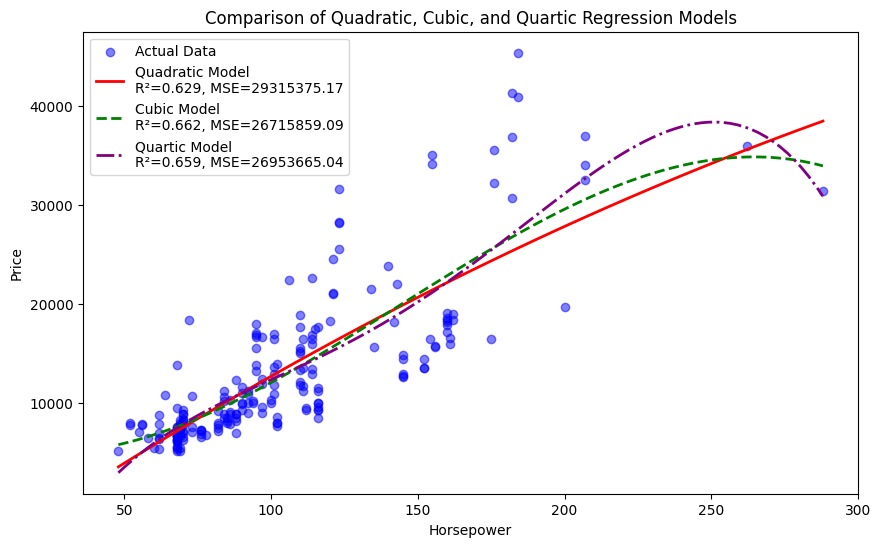

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Select independent (X) and dependent (y) variables
X = car_data[['horsepower']]
y = car_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformations for Quadratic, Cubic, and Quartic Models
poly_quad = PolynomialFeatures(degree=2)
X_train_quad = poly_quad.fit_transform(X_train)
X_test_quad = poly_quad.transform(X_test)

poly_cubic = PolynomialFeatures(degree=3)
X_train_cubic = poly_cubic.fit_transform(X_train)
X_test_cubic = poly_cubic.transform(X_test)

poly_quartic = PolynomialFeatures(degree=4)
X_train_quartic = poly_quartic.fit_transform(X_train)
X_test_quartic = poly_quartic.transform(X_test)

# Initialize and train models
model_quad = LinearRegression().fit(X_train_quad, y_train)
model_cubic = LinearRegression().fit(X_train_cubic, y_train)
model_quartic = LinearRegression().fit(X_train_quartic, y_train)

# Make predictions
y_pred_quad = model_quad.predict(X_test_quad)
y_pred_cubic = model_cubic.predict(X_test_cubic)
y_pred_quartic = model_quartic.predict(X_test_quartic)

# Calculate MSE and R² for each model
mse_quad, r2_quad = mean_squared_error(y_test, y_pred_quad), r2_score(y_test, y_pred_quad)
mse_cubic, r2_cubic = mean_squared_error(y_test, y_pred_cubic), r2_score(y_test, y_pred_cubic)
mse_quartic, r2_quartic = mean_squared_error(y_test, y_pred_quartic), r2_score(y_test, y_pred_quartic)

# Generate values for smooth plotting
X_range = np.linspace(X['horsepower'].min(), X['horsepower'].max(), 100).reshape(-1, 1)
y_range_quad = model_quad.predict(poly_quad.transform(X_range))
y_range_cubic = model_cubic.predict(poly_cubic.transform(X_range))
y_range_quartic = model_quartic.predict(poly_quartic.transform(X_range))

# Plot the data and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_range, y_range_quad, color='red', linewidth=2, label=f'Quadratic Model\nR²={r2_quad:.3f}, MSE={mse_quad:.2f}')
plt.plot(X_range, y_range_cubic, color='green', linestyle='--', linewidth=2, label=f'Cubic Model\nR²={r2_cubic:.3f}, MSE={mse_cubic:.2f}')
plt.plot(X_range, y_range_quartic, color='purple', linestyle='-.', linewidth=2, label=f'Quartic Model\nR²={r2_quartic:.3f}, MSE={mse_quartic:.2f}')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Comparison of Quadratic, Cubic, and Quartic Regression Models')
plt.legend(loc='upper left')
plt.show()


### Summary:

Here we can see that the R2 value of the quartic model is 0.65, which lower than the cubic model. This means that the cubic model explains more of the variance in the data compared to the quartic model. Therefore, the cubic model is likely a better fit for the data. Hence, it would be unnecessary to use a quartic model in this case.

Deciding when to stop increasing the polynomial degree is essential because higher degrees don't always improve the model meaningfully and can lead to overfitting. Here are key points that indicate when it’s unnecessary to continue increasing the polynomial degree:

1. Diminishing Returns in Metrics (MSE and 
R
2
R 
2
 )
If the 
R
2
R 
2
  value stops improving significantly, it suggests that adding more complexity (higher degree) isn't helping the model explain the data better.
Similarly, if the Mean Squared Error (MSE) stabilizes, increasing the polynomial degree may be capturing noise rather than the actual relationship.
2. Overfitting the Data
Higher-degree polynomials can create overly complex models that fit the training data extremely well but fail to generalize to new data. Signs of overfitting include:
Very high 
R
2
R 
2
  on training data but a much lower 
R
2
R 
2
  on testing data.
Wiggly, oscillating curves that attempt to pass through every point in the training set, which usually don't generalize well.
3. Model Interpretability
Higher-degree models become harder to interpret. For practical purposes, simpler models (e.g., quadratic or cubic) are often more desirable as they capture the general trend without over-complicating the relationship.
4. Checking the Residuals Plot
A residuals plot shows the difference between actual and predicted values. For a good model, residuals should be randomly scattered around zero. Patterns or systematic trends in residuals as you increase the polynomial degree might suggest overfitting.
5. Comparing Cross-Validation Scores
Using cross-validation, we can check how the model performs across different subsets of the data. If the cross-validation scores start to decrease or remain stable with higher degrees, then further complexity isn’t beneficial.
In summary, a combination of stable metrics, the appearance of overfitting, and interpretability considerations usually indicate that a further increase in polynomial degree isn’t needed.

### Final Ilustration on when to stop increasing the polynomial degree

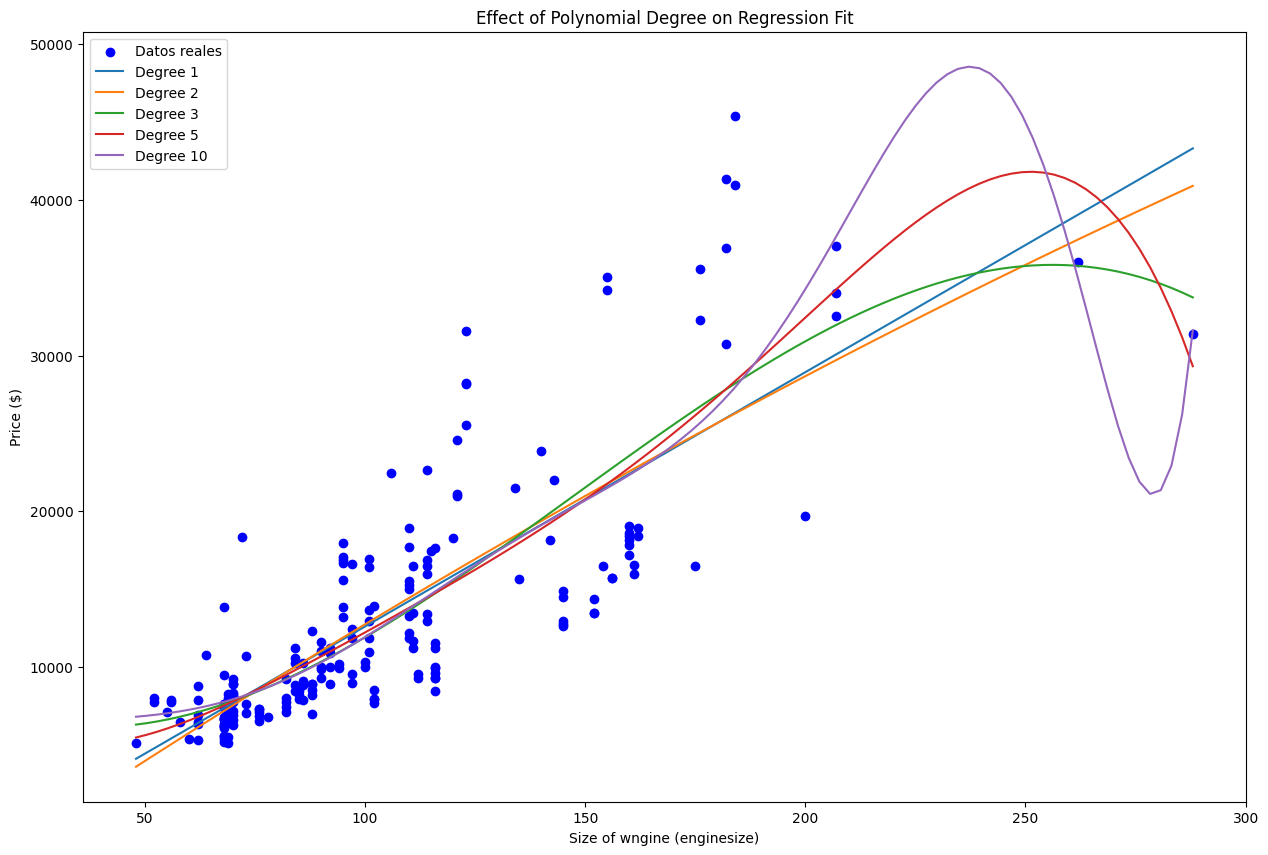

In [28]:
# Importamos las bibliotecas necesarias para graficar varios grados de polinomios
degrees = [1, 2, 3, 5, 10]  # Grados de polinomio a probar

# Configurar la gráfica
plt.figure(figsize=(15, 10))
plt.scatter(X, y, color='blue', label="Datos reales")

# Probar diferentes grados de polinomio
for degree in degrees:
    # Transformación polinómica del grado actual
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Ajustar el modelo de regresión polinómica
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predecir usando el modelo ajustado
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    # Graficar la curva de ajuste
    plt.plot(X_plot, y_plot, label=f"Degree {degree}")

# Configuración final de la gráfica
plt.xlabel("Size of wngine (enginesize)")
plt.ylabel("Price ($)")
plt.title("Effect of Polynomial Degree on Regression Fit")
plt.legend()
plt.show()
